<a href="https://colab.research.google.com/github/jairosantoy/jairo/blob/main/A00832650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis del uso de las redes sociales

In [3]:
path = 'https://raw.githubusercontent.com/tdm09/evidencias-entregas2039_101-jairosantoy/main/dummy_data.csv?token=GHSAT0AAAAAACO2K6LW27ES5ITGZUBS2GNGZPU67LQ'

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv(path)
df.head(1000)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


# Descripción de la base de datos:

Esta base de datos representa una captura de datos donde se explican caracteristicas de los usuarios de las redes sociales, se muestra, la edad, el genero, el tiempo que le dedican, la plataforma que utilizan, sus intereses, la ubicacion y algunos datos que explican a que se dedican estas personas.

Utilizare esta base de datos para responder algunas preguntas.

# Descripción de las variables y sus tipos


The description for each column is as follows:

age [Numérica]: The age of the user.

gender [Categorica]: The gender identity of the user (Male, Female, Non-binary).

demographics [Categorica]: The type of area the user resides in (Urban, Suburban, Rural).

interests [Categorica]: The user's primary area of interest or hobby.

device_type [Categorica]: The type of device used by the user (Mobile).

location [Categorica]:The country of residence for the user.

platform [Categorica] : The social media platform where the user spends time.

profession [Categorica] : The user's occupation or professional status.

income [Numérica]: The yearly income of the user.

indebt [Categorica] : Indicates whether the user is in debt (True or False).

homeowner [Categorica] : Indicates whether the user owns a home (True or False).

owns_cars [Categorica] : Indicates whether the user owns cars (True or False).


# 1. ¿Cual es la plataforma mas utilizada por los usuarios?




In [5]:
platform_usage = pd.pivot_table(df, values='location', index='platform', aggfunc='count', fill_value=0)
platform_usage

,location
platform,
Facebook,307
Instagram,363
YouTube,330


La plataforma mas utilizada es instagram con 363 usuarios.

# 2. ¿Cómo se distribuyen las preferencias de intereses de los usuarios en nuestra base de datos?

In [6]:
import plotly.express as px

fig = px.sunburst(df, path=['interests'], title='Distribución de preferencias de intereses de los usuarios')
fig.show()

La distribución de intereses es casi pareja entre los 3 principales intereses. Los cuales son Lifestyle, Sports, Travel.

# 3. ¿Cómo varía el tiempo pasado en la plataforma según la ubicación de los usuarios?

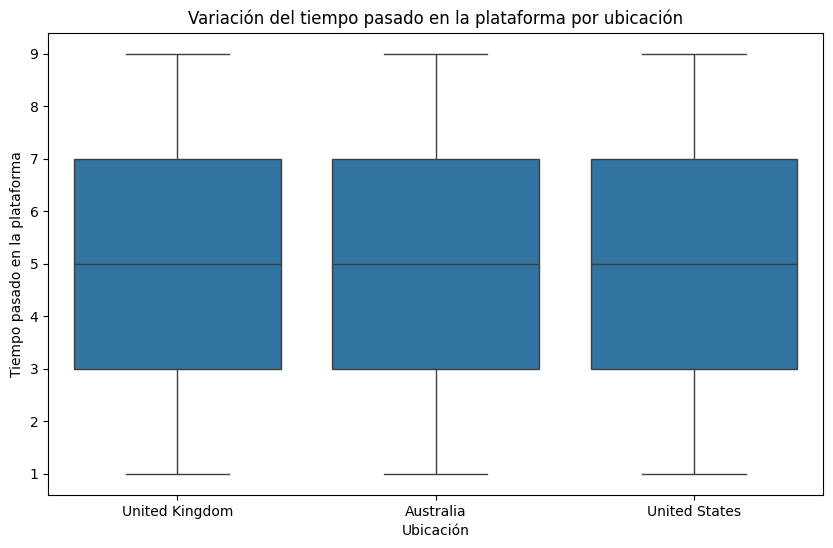

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='time_spent', data=df)
plt.title('Variación del tiempo pasado en la plataforma por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Tiempo pasado en la plataforma')
plt.show()

El tiempo utilizado en las redes sociales no inlfuye por su ubicación, en esta gráfica de caja podemos ver que en las 3 ubicaciones distintas es exactamente la misma, tienen un promedio de 5 horas en redes sociales al día.

# 4. ¿Cuál es la cantidad de usuarios por plataforma en nuestra base de datos?

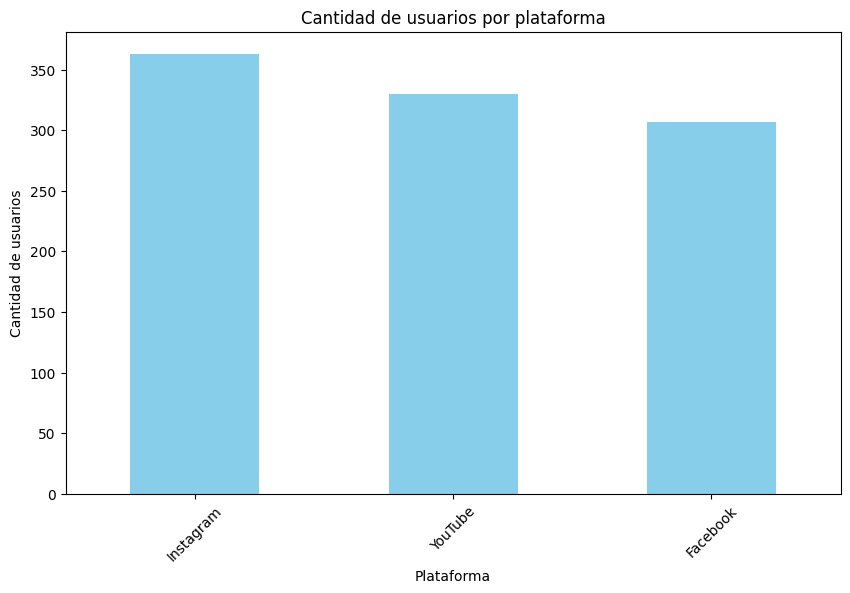

In [8]:
import matplotlib.pyplot as plt

usuarios_por_plataforma = df['platform'].value_counts()

plt.figure(figsize=(10, 6))
usuarios_por_plataforma.plot(kind='bar', color='skyblue')
plt.title('Cantidad de usuarios por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45)
plt.show()


La cantidad de usuarios de Instagram son aproximadamente 350, de youtube alrededor de 330 y en Facebook alrededor de 300.

# 5. ¿Cuál es la distribución de género de los usuarios en la plataforma?

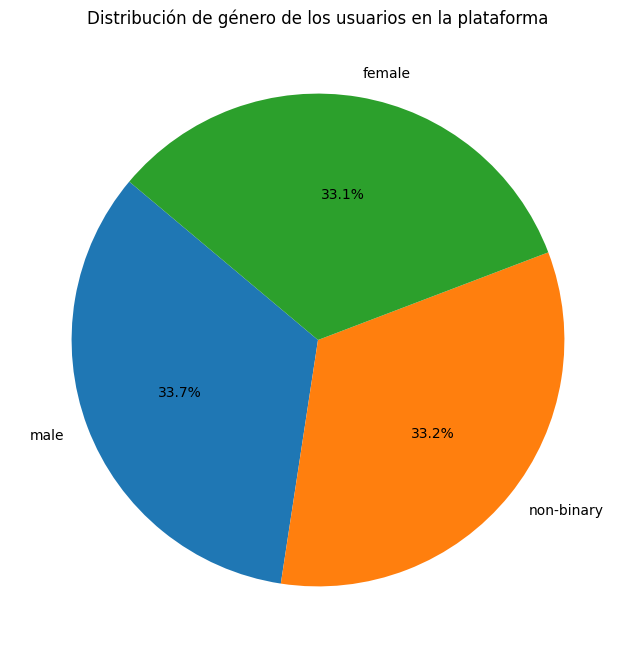

In [9]:
conteo_genero = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de género de los usuarios en la plataforma')
plt.show()


La distribución de genero en los usuarios de esta plataforma es muy pareja, masculino, femenino y no binario, tienen alrededor de 1/3 parte cada uno. Esto significa que no importa el genero para ser usuario de redes sociales.

# 6. ¿Existe una relación entre la edad de los usuarios y sus ingresos?

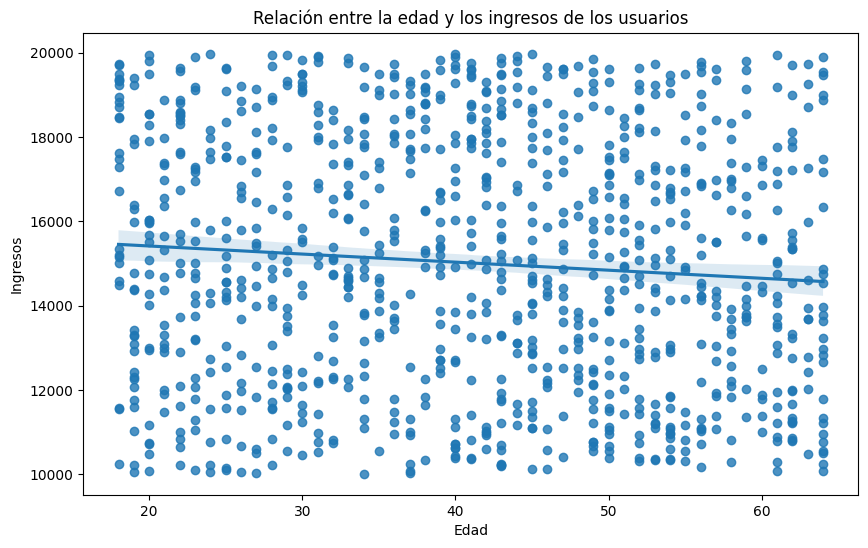

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='income', data=df)
plt.title('Relación entre la edad y los ingresos de los usuarios')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

Podemos notar con la gráfica que no existe una relación entre la edad de las personas y sus ingresos, en algunos casos si pero en la mayoría no. Existen mas factores que pueden afectar en ingreso aparte de la edad.

# 7. ¿Cuanto tiene de ingreso una persona de 56 años?

Income = b0+b1(age)

In [11]:
model1=sm.OLS.from_formula('income ~ age',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.681
Date:                Sat, 16 Mar 2024   Prob (F-statistic):            0.00569
Time:                        01:36:58   Log-Likelihood:                -9407.1
No. Observations:                1000   AIC:                         1.882e+04
Df Residuals:                     998   BIC:                         1.883e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.58e+04    298.242     52.977      0.000    1.52e+04    1.64e+04
age          -19.1556      6.912     -2.771      0.006     -32.719      -5.592
==============================================================================
Omnibus:                      830.056   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.560
Skew:                           0.021   Prob(JB):                     4.29e-14
Kurtosis:                       1.785   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print('El ingreso de una persona de 56 años es de:',1.58e+04+-19.1556*(56) )

El ingreso de una persona de 56 años es de: 14727.2864


# 8. ¿Cómo se distribuyen los ingresos de los usuarios en la plataforma?

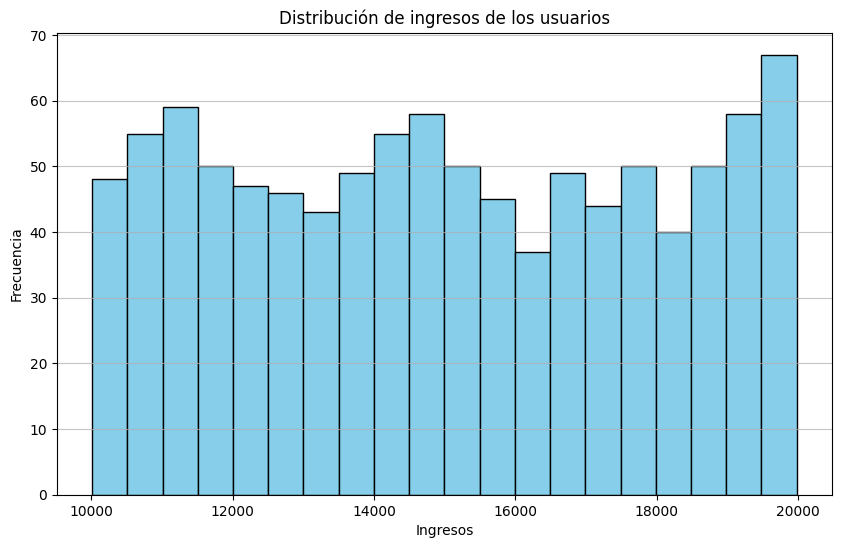

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de ingresos de los usuarios')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


En la gráfica podemos ver la manera en la que se distribuyen los ingresos. Existen mas usuarios con ingresos altos.

# Conclusión

Al desglosar la base de datos que elegi pude usar varias funciones distintas que aprendí en el lenguaje de python. Esta vez es la primera vez que utilizo colab.

Utilice varias funciones distintas en donde se me permitio aprender a analizar las bases de datos.